# Cosmological parameter estimation

In [1]:
import numpy as np
from getdist import loadMCSamples
from getdist import plots
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from getdist import loadMCSamples
import matplotlib as mpl
from matplotlib import colors as mcolors

plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['lines.linewidth'] = 2.0

# Set global font sizes
mpl.rcParams['axes.labelsize'] = 24         # x/y label size
mpl.rcParams['axes.titlesize'] = 24         # subplot title size
mpl.rcParams['xtick.labelsize'] = 20        # tick labels
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20        # legend text
mpl.rcParams['figure.titlesize'] = 20       # optional for fig.suptitle()

# CHANGE THIS PATH IN ORDER TO MATCH THE PATH OF YOUR PACKAGE
PATH_PACKAGE = '/home/miguel/Desktop/PlanckBIRD-lens'
# PATH_PACKAGE = './../'

In [2]:
# Input values 

fac = 0.25

IV = [67.36, 0.9649, 0.02237, 0.12, 2.1e-9, 0.8109, 0.31519]
IV.append(IV[5]*(IV[6]/0.3)**fac)

# Load samples: # 

In [3]:
analysis_settings = {'ignore_rows': '0.3'}
inp_dir = f'{PATH_PACKAGE}/data/MCMC_chains'
# inp_dir = f'{PATH_PACKAGE}/Chains/'
directory_plots = f'{PATH_PACKAGE}/notebooks/plots'

samples_Planck_s1d1 = loadMCSamples(inp_dir + '/Planck/s1d1/Results/Planck_s1d1', settings = analysis_settings)
samples_Planck_s5d10 = loadMCSamples(inp_dir + '/Planck/s5d10/Results/Planck_s5d10', settings = analysis_settings)

samples_LiteBIRD_s1d1 = loadMCSamples(inp_dir + '/LiteBIRD/s1d1/Results/LiteBIRD_s1d1', settings = analysis_settings)
samples_LiteBIRD_s5d10 = loadMCSamples(inp_dir + '/LiteBIRD/s5d10/Results/LiteBIRD_s5d10', settings = analysis_settings)

samples_Planck_LiteBIRD_s1d1 = loadMCSamples(inp_dir + '/Planck+LiteBIRD/s1d1/Results/PlanckBIRD_s1d1', settings = analysis_settings)
samples_Planck_LiteBIRD_s5d10 = loadMCSamples(inp_dir + '/Planck+LiteBIRD/s5d10/Results/PlanckBIRD_s5d10', settings = analysis_settings)


In [4]:
# Add and plot a new derived parameter

p_LiteBIRD_s1d1 = samples_LiteBIRD_s1d1.getParams()
samples_LiteBIRD_s1d1.addDerived(p_LiteBIRD_s1d1.sigma8*(p_LiteBIRD_s1d1.Omega_m/0.3)**0.25, name='S8', label='S_{8}^{\\rm{CMBL}}')

p_LiteBIRD_s5d10 = samples_LiteBIRD_s5d10.getParams()
samples_LiteBIRD_s5d10.addDerived(p_LiteBIRD_s5d10.sigma8*(p_LiteBIRD_s5d10.Omega_m/0.3)**0.25, name='S8', label='S_{8}^{\\rm{CMBL}}')

p_Planck_LiteBIRD_s1d1 = samples_Planck_LiteBIRD_s1d1.getParams()
samples_Planck_LiteBIRD_s1d1.addDerived(p_Planck_LiteBIRD_s1d1.sigma8*(p_Planck_LiteBIRD_s1d1.Omega_m/0.3)**0.25, name='S8', label='S_{8}^{\\rm{CMBL}}')
samples_Planck_LiteBIRD_s1d1.addDerived(p_Planck_LiteBIRD_s1d1.H0, name='H0_2', label='H_{0} [\mathrm{km}\cdot\mathrm{s}^{-1} \mathrm{Mpc}^{-1}]')

p_Planck_LiteBIRD_s5d10 = samples_Planck_LiteBIRD_s5d10.getParams()
samples_Planck_LiteBIRD_s5d10.addDerived(p_Planck_LiteBIRD_s5d10.sigma8*(p_Planck_LiteBIRD_s5d10.Omega_m/0.3)**0.25, name='S8', label='S_{8}^{\\rm{CMBL}}')

p_Planck_s1d1 = samples_Planck_s1d1.getParams()
samples_Planck_s1d1.addDerived(p_Planck_s1d1.sigma8*(p_Planck_s1d1.Omega_m/0.3)**0.25, name='S8', label='S_{8}^{\\rm{CMBL}}')

p_Planck_s5d10 = samples_Planck_s5d10.getParams()
samples_Planck_s5d10.addDerived(p_Planck_s5d10.sigma8*(p_Planck_s5d10.Omega_m/0.3)**0.25, name='S8', label='S_{8}^{\\rm{CMBL}}')


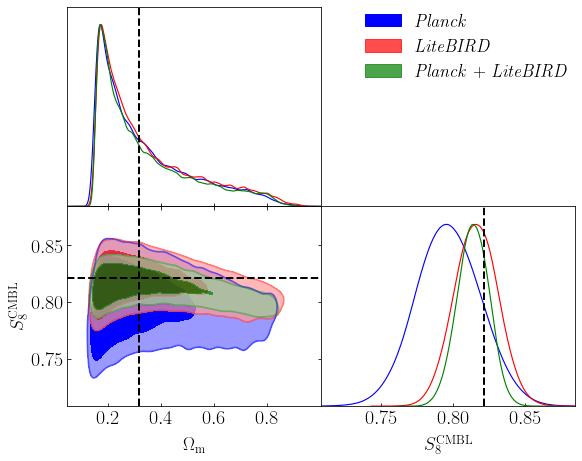

In [5]:
custom_labels = ["\\textit{Planck}", "\\textit{LiteBIRD}", "\\textit{Planck} + \\textit{LiteBIRD}"]

# Create plotter and set general settings
g = plots.get_subplot_plotter(subplot_size=4, subplot_size_ratio=0.8)
g.settings.alpha_filled_add = 0.7
g.settings.linewidth_contour = 1.5
g.settings.figure_legend_frame = False  # <-- Disable frame around legend
g.settings.lab_fontsize = 18  # For axis labels
g.settings.legend_fontsize = 18  # For legend text

# Create triangle plot
g.triangle_plot(
    [samples_Planck_s1d1, samples_LiteBIRD_s1d1, samples_Planck_LiteBIRD_s1d1],
    ['Omega_m', 'S8'], 
    filled=True, 
    shaded=False, 
    legend_labels=custom_labels,
    contour_colors=['blue', 'red', 'green']
)

# Adjust spacing
g.fig.subplots_adjust(hspace=0.05, wspace=0.05)

# Add reference lines
g.subplots[0, 0].axvline(IV[6], color="black", ls="--")
g.subplots[1, 0].axvline(IV[6], color="black", ls="--")
g.subplots[1, 0].axhline(IV[7], color="black", ls="--")
g.subplots[1, 1].axvline(IV[7], color="black", ls="--")

# Optional: adjust tick label sizes for all subplots
for i in range(g.subplots.shape[0]):
    for j in range(g.subplots.shape[1]):
        if g.subplots[i, j] is not None:
            g.subplots[i, j].tick_params(axis="both", labelsize=20)

# Export figure
g.export(f"{directory_plots}/Contours_OmegaM_sigma8.pdf")

<Figure size 432x345.6 with 0 Axes>

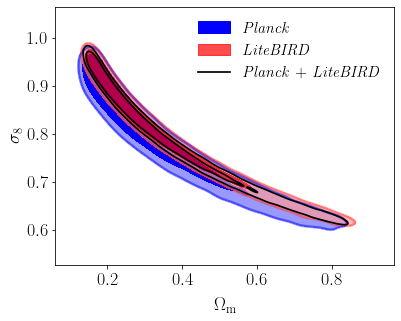

In [6]:
# RGBA format: red with alpha = 0.3
lighter_blue = mcolors.to_rgba('blue', alpha=0.3)

# Create plotter
g = plots.get_single_plotter(ratio=0.8)

# Labels and parameter pair
custom_labels = ["\\textit{Planck}", "\\textit{LiteBIRD}", "\\textit{Planck} + \\textit{LiteBIRD}"]
pairs = [['Omega_m', 'sigma8']]

# Settings
g.settings.lab_fontsize = 18                   # Axis label font size
g.settings.axes_labelsize = 18                 # Legacy version, just in case
g.settings.legend_loc = None
g.settings.legend_frac_subplot_margin = -0.2
g.settings.linewidth_contour = 1.5
g.settings.alpha_filled_add = 0.7
g.settings.legend_fontsize = 16

# Plot first two datasets
g.plots_2d(
    [samples_Planck_s1d1, samples_LiteBIRD_s1d1],
    param_pairs=pairs,
    filled=True,
    shaded=False,
    colors=['blue', 'red'],
    lims=[0.05, 0.95, 0.55, 1.05]
)

# Plot third dataset
g.plot_2d(
    samples_Planck_LiteBIRD_s1d1,
    'Omega_m',
    'sigma8',
    filled=False,
    ls='-'
)

# Handle legend
g.legend.set_visible(False)
g.add_legend(custom_labels)

# Remove legend frame
if g.legend:
    frame = g.legend.get_frame()
    frame.set_linewidth(0)
    frame.set_edgecolor('none')
    frame.set_facecolor('none')

# Set tick parameters and axis ticks
ax = plt.gca()
ax.tick_params(labelsize=18)
ax.set_xticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])

# Figure size
fig = g.fig
fig.set_size_inches(5.5, 4.4)

# Export
g.export(f"{directory_plots}/Omega_M_vs_sigma8.pdf")

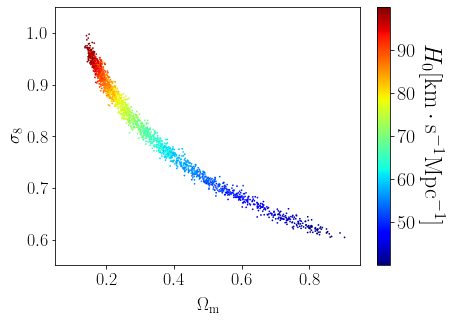

In [7]:
# RGBA format: red with alpha = 0.3
lighter_blue = mcolors.to_rgba('blue', alpha=0.3)

# Create plotter
g = plots.get_single_plotter(ratio=0.8)

# Labels and parameter pair
custom_labels = ["\\textit{Planck}", "\\textit{LiteBIRD}", "\\textit{Planck} + \\textit{LiteBIRD}"]
pairs = [['Omega_m', 'sigma8']]

# Settings
g.settings.lab_fontsize = 18                   # Axis label font size
g.settings.axes_labelsize = 18                 # Legacy version, just in case
g.settings.legend_loc = None
g.settings.legend_frac_subplot_margin = -0.2
g.settings.linewidth_contour = 1.5
g.settings.alpha_filled_add = 0.7
g.settings.legend_fontsize = 16

g.plot_3d([samples_Planck_LiteBIRD_s1d1], ['Omega_m', 'sigma8', 'H0_2'], lims=[0.05, 0.95, 0.55, 1.05], color_bar = False)

# Set tick parameters and axis ticks
ax = plt.gca()
ax.tick_params(labelsize=18)
ax.set_xticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])

# Figure size
fig = g.fig
fig.set_size_inches(5.5, 4.4)
cbar = fig.colorbar(ax.collections[0], ax=ax, fraction=0.05)
cbar.set_label('$H_{0} [\mathrm{km}\cdot\mathrm{s}^{-1} \mathrm{Mpc}^{-1}]$', rotation=270, labelpad=30)

# Export
g.export(f"{directory_plots}/Omega_M_vs_sigma8_vs_H0.pdf")